In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

/home/xxy/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


For this part, we make GPT4.0 just output quality score without any explanation.

## 1. training
![training](ref_prompt.png)

(169,) (169,)
PLCC: 0.4335
SRCC: 0.4004


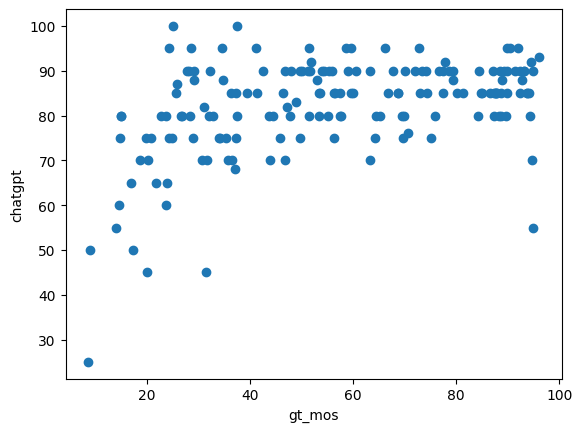

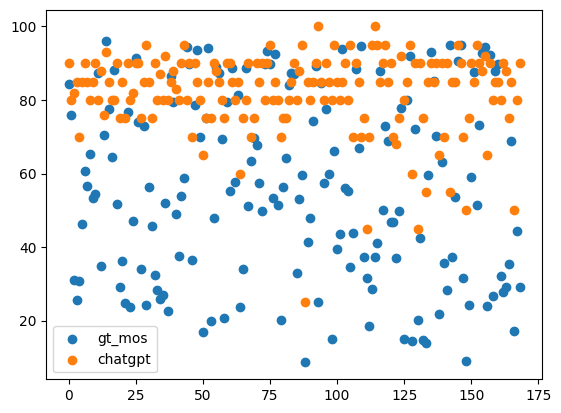

In [6]:
df = pd.read_csv("gpt_score3.csv")

# extract the third column and transform to numpy array
scores = df.iloc[:, 2].to_numpy()
# extract non nan values
scores = scores[~np.isnan(scores)]

gt_scores = []
frames = []
with open('LIVE_r2.txt', 'r') as f:
    lines = f.readlines()
    for l in lines:
        l = l.strip()
        if 'jp2k' in l:
            frame = os.path.basename(l.split(',')[-2]).rstrip('.bmp').lstrip('img')
            s = l.split(',')[-1]
            gt_scores.append(float(s))
            frames.append(int(frame))

gt_scores = np.array(gt_scores)
frames = np.array(frames)
gt_mos = 100-gt_scores

gtp_scores = scores[frames-1]

print(gt_mos.shape, gtp_scores.shape)
plcc, _ = pearsonr(gt_mos, gtp_scores)
srcc, _ = spearmanr(gt_mos, gtp_scores)
print("PLCC: {:.4f}".format(plcc))
print("SRCC: {:.4f}".format(srcc))

# plot scatter plots
plt.figure()
plt.scatter(gt_mos, gtp_scores)
plt.xlabel('gt_mos')
plt.ylabel('chatgpt')
plt.show()
plt.figure()
plt.scatter(np.arange(gt_mos.shape[0]), gt_mos, label='gt_mos')
plt.scatter(np.arange(gtp_scores.shape[0]), gtp_scores, label='chatgpt')
plt.legend()
plt.show()